<a href="https://colab.research.google.com/github/arara90/Python-Machine-learning/blob/master/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PCA

1. PCA에 적용할 수 있는 데이터를 만드는 법
2. sklearn의 PCA 함수 사용하기
3.  각각의 principal component가 차지하는 변형이 얼마나 되는지 결정한다.
4. matplotlib을 사용하여 PCA 그래프 그리기.
5. 어떤 변수가 그래프에 가장 큰 영향을 미칠지 결정하기 위해 loading scores 살펴보기

In [0]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt


## 1. 데이터셋 만들기

In [0]:
genes = ['gene' + str(i) for i in range(1,101)]

wt = ['wt'  + str(i) for i in range(1,6)] # wild type (1,2,3,4,5)
ko = ['ko'  + str(i) for i in range(1,6)] # knock out

#*는 array를 unpack해준다. 그래서 아래 코드는 wt와 ko를 1차원으로 쭉 붙여준 형태가 됨.
data = pd.DataFrame(columns = [*wt, *ko], index = genes )

data.shape, ex_Data.shape
#ex_Data =  pd.DataFrame(columns = [wt, ko], index = genes )
#data
#ex_Data

((100, 10), (100, 5))

In [0]:
for gene in data.index:
  data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5)
  data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam = rd.randrange(10,1000), size = 5) 
print(data.head())
print(data.shape)

       wt1  wt2  wt3  wt4  wt5  ko1   ko2  ko3  ko4  ko5
gene1  554  538  579  496  551  900   813  876  875  801
gene2  390  346  384  361  356  429   454  435  430  450
gene3  442  499  482  475  458  726   708  741  755  741
gene4  475  428  425  443  402  606   572  598  572  605
gene5  585  645  583  596  587  964  1045  948  920  916
(100, 10)


## 2. 데이터 가운데로 모으고, 스케일링 하기
>after  
>  centering : 각각 gene에 대한 평균 값은 0  
>  scaling : 표준 편차는 1

In [0]:
scaled_data = preprocessing.scale(data.T) #data.T -> column이 아닌 rows로 바꿈 (scale 함수가 요구하는 대로)
# StandardScaler().fit_transform(data.T) 같은 기능

pca = PCA()
pca.fit(scaled_data) # loading scores 와 분산을 계산함
pca_data = pca.transform(scaled_data) # 그래프를 위한 좌표 생성 (loading Score와 scaled data에 대한)

data.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,554,390,442,475,585,600,41,935,742,271,...,772,756,984,274,74,770,477,315,161,742
wt2,538,346,499,428,645,625,37,1034,725,239,...,805,776,960,313,61,755,496,314,158,746
wt3,579,384,482,425,583,624,36,981,744,259,...,768,790,950,270,67,768,491,275,171,776
wt4,496,361,475,443,596,608,41,990,740,244,...,787,771,959,295,80,723,487,311,146,749
wt5,551,356,458,402,587,541,36,939,721,222,...,840,783,964,305,72,772,460,271,156,796
ko1,900,429,726,606,964,682,110,498,36,953,...,89,750,261,388,443,129,906,316,516,405
ko2,813,454,708,572,1045,695,121,485,28,919,...,112,766,230,393,473,125,875,299,558,396
ko3,876,435,741,598,948,692,119,521,40,940,...,99,716,277,395,469,128,878,304,558,410
ko4,875,430,755,572,920,724,131,473,30,997,...,114,712,259,420,465,140,830,359,565,435
ko5,801,450,741,605,916,791,136,471,25,960,...,92,713,240,384,449,127,895,276,570,371


##3. Scree plot
> PC별로  차지하는 퍼센트 확인하기

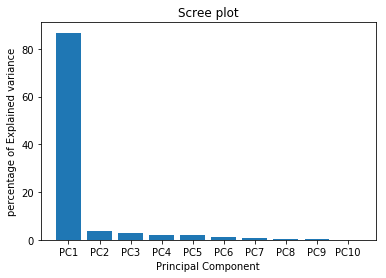

In [0]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1) #각각의 principal component가 차지하는 퍼센트 계산
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1 ) ]

plt.bar(x=range(1, len(per_var) + 1), height = per_var, tick_label = labels)
plt.ylabel('percentage of Explained variance')
plt.xlabel('Principal Component')
plt.title('Scree plot')
plt.show()

> 대부분의 variation이 첫번째 PC를 따르므로, PC1과 PC2를 사용하면 원본 데이터를 잘 표현할 수 있을 것!

## 4. 3에서 확인한 내용을 바탕으로 PCA 그래프 그리기


In [0]:
pca_df = pd.DataFrame(pca_data, index=[*wt,*ko], columns = labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.061558,-1.238601,1.200520,3.398013,-0.099660,-1.076987,-0.444557,-0.162252,-0.065616,-2.869424e-15
wt2,9.368340,-2.016788,-1.639071,-1.116859,1.320534,-0.408825,0.853259,0.702766,-0.842858,-5.632367e-16
wt3,9.067209,-2.424317,-1.699114,-0.536109,-1.270998,0.995621,0.157821,-0.541584,0.920974,1.974622e-16
wt4,9.188027,1.840273,2.432344,-0.072838,0.477635,2.032376,-0.332892,0.467646,-0.192333,-5.041886e-16
wt5,9.889006,3.719010,-0.289633,-1.562849,-0.481887,-1.471575,-0.214616,-0.469610,0.171066,7.575777e-16


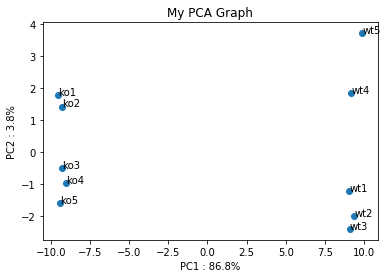

In [0]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 : {0}%'.format(per_var[0]))
plt.ylabel('PC2 : {0}%'.format(per_var[1]))

for sample in pca_df.index:
  plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample])) 
  
plt.show()

ko와 wt가 매우 잘 나뉘어진 것을 확인할 수 있다.

##5. Loading Score 살펴보기

* 어떤 gene이 x축을 따라 두개의 클러스터로 나누는데 가장 큰 영향을 끼쳤을까?

In [0]:
loading_scores = pd.Series(pca.components_[0], index = genes) # PCs  are zero-indexe, so PC1 = 0
sorted_loading_scores = loading_scores.abs().sort_values(ascending = False)

top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene91    0.107261
gene56   -0.107246
gene35    0.107241
gene25    0.107236
gene70    0.107223
gene96    0.107219
gene82   -0.107218
gene9     0.107210
gene21   -0.107202
gene93    0.107195
dtype: float64


86.8